weights (上位): [3.339e-01 3.325e-01 3.302e-01 1.400e-03 1.400e-03 4.000e-04 1.000e-04
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
有効成分数: 3  /  12
有効成分 index: [0, 2, 4]


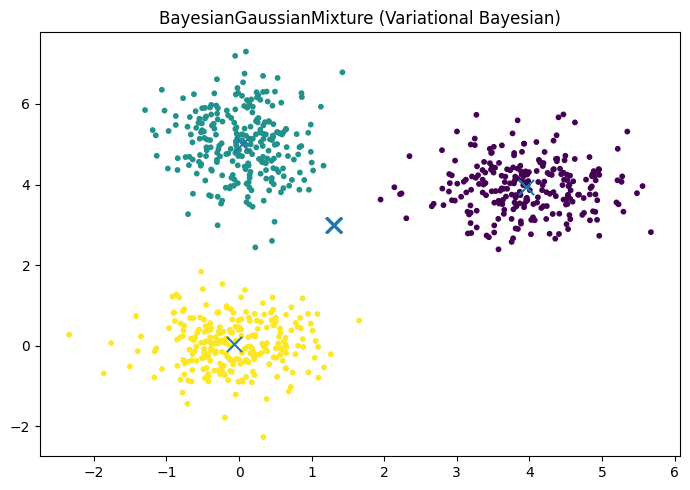

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

# -----------------------------
# 1) サンプルデータ（2次元・3クラスタ）
# -----------------------------
rng = np.random.default_rng(0)

X = np.vstack([
    rng.normal(loc=[0, 0], scale=[0.6, 0.6], size=(250, 2)),
    rng.normal(loc=[4, 4], scale=[0.7, 0.7], size=(250, 2)),
    rng.normal(loc=[0, 5], scale=[0.5, 0.8], size=(250, 2)),
])

# -----------------------------
# 2) Bayesian GMM（変分ベイズ）
#    n_components は「上限」：多めに置いて自動で潰す
# -----------------------------
Kmax = 12
bgmm = BayesianGaussianMixture(
    n_components=Kmax,
    covariance_type="full",

    # ★「Dirichlet process」風：不要成分の重みが小さくなる
    weight_concentration_prior_type="dirichlet_process",
    weight_concentration_prior=0.5,   # 小さいほど「少数成分」を好む傾向

    # 平均・共分散の事前（デフォルトでもOK。安定させたいなら調整）
    mean_precision_prior=1.0,

    max_iter=2000,
    tol=1e-4,
    init_params="kmeans",
    random_state=0,
).fit(X)

# -----------------------------
# 3) 予測（クラスタ割当）と「有効成分」の確認
# -----------------------------
z = bgmm.predict(X)
w = bgmm.weights_
active = np.where(w > 0.01)[0]   # 重み1%超を有効とみなす例

print("weights (上位):", np.round(np.sort(w)[::-1], 4))
print("有効成分数:", len(active), " / ", Kmax)
print("有効成分 index:", active.tolist())

# -----------------------------
# 4) 可視化：点（色=クラスタ）＋推定平均（×）
# -----------------------------
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=z, s=10)

means = bgmm.means_
plt.scatter(means[:, 0], means[:, 1], marker="x", s=120)

plt.title("BayesianGaussianMixture (Variational Bayesian)")
plt.tight_layout()
plt.show()
